# **1. Nhập và xử lý dữ liệu**

In [1]:
# Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
## Nhập dữ liệu

# Cài thư viện để đọc dữ liệu từ uci
from ucimlrepo import fetch_ucirepo

#  Đọc & tạo df có id=352 (Thông tin từ dataset)
df_online_retail = fetch_ucirepo(id=352).data.original

# Kiểm tra dữ liệu
df_online_retail.shape
df_online_retail.info()
df_online_retail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Chuyển kiểu dữ liệu của InvoiceDate về datetime
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'], errors='coerce')
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Tạo bảng dữ liệu df từ 7/2011 đến 11/2011 từ bảng dữ liệu df_online_retail
df = df_online_retail[(df_online_retail['InvoiceDate'] >= '2011-07-01') & (df_online_retail['InvoiceDate'] <= '2011-11-30')]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
245903,558638,84836,ZINC METAL HEART DECORATION,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom
245904,558638,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-07-01 08:16:00,0.85,16317.0,United Kingdom
245905,558638,22784,LANTERN CREAM GAZEBO,3,2011-07-01 08:16:00,4.95,16317.0,United Kingdom
245906,558638,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-07-01 08:16:00,0.95,16317.0,United Kingdom
245907,558638,22674,FRENCH TOILET SIGN BLUE METAL,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom


In [5]:
df.shape

(267027, 8)

In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,267027.000000,267027,267027.000000,210084.000000
mean,9.854689,2011-09-28 18:49:28.582278400,4.105782,15293.688329
min,-4830.000000,2011-07-01 08:16:00,-11062.060000,12347.000000
25%,1.000000,2011-08-24 16:18:00,1.250000,13994.000000
50%,4.000000,2011-10-05 15:17:00,2.080000,15159.000000
75%,12.000000,2011-11-07 13:45:00,4.130000,16764.000000
max,12540.000000,2011-11-29 18:19:00,11062.060000,18287.000000
std,49.800445,NaN,65.047725,1704.235662


In [7]:
#Kiểm tra dữ liệu bị thiếu
df.isnull().sum().sort_values(ascending=False)

CustomerID     56943
Description      511
StockCode          0
InvoiceNo          0
Quantity           0
InvoiceDate        0
UnitPrice          0
Country            0
dtype: int64

Nhóm nhận thấy một số bản ghi thiếu thông tin ở các trường quan trọng như CustomerID và Description. Cụ thể:

- CustomerID là định danh duy nhất cho mỗi khách hàng, đóng vai trò cốt lõi trong việc phân tích hành vi tiêu dùng, tần suất mua hàng,… Việc thiếu mã khách hàng khiến những bản ghi này không thể gắn kết với bất kỳ cá nhân cụ thể nào, dẫn đến thiếu tính liên kết trong phân tích.

- Description cung cấp thông tin mô tả sản phẩm, là yếu tố quan trọng để phân loại, thống kê và đánh giá danh mục sản phẩm. Việc thiếu mô tả làm giảm khả năng hiểu rõ nội dung giao dịch.

Vì vậy, để đảm bảo độ tin cậy cho quá trình phân tích dữ liệu, chúng em quyết định loại bỏ các bản ghi bị thiếu CustomerID hoặc Description.

In [ ]:
## Tạo bảng dữ liệu đã được làm sạch df1.
# Xóa dòng thiếu thông tin khách hàng & description
df1 = df.dropna(subset=['CustomerID', 'Description'])
df1.shape

(210084, 8)

In [9]:
## Kiểm tra dữ liệu trùng lặp

# Tổng số dòng trùng
df1.duplicated().sum()

# Hiển thị dòng trùng
df1[df1.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246406,558700,22332,SKULLS PARTY BAG + STICKER SET,1,2011-07-01 12:33:00,1.65,17920.0,United Kingdom
246420,558700,21242,RED RETROSPOT PLATE,1,2011-07-01 12:33:00,1.69,17920.0,United Kingdom
246425,558700,22553,PLASTERS IN TIN SKULLS,1,2011-07-01 12:33:00,1.65,17920.0,United Kingdom
246430,558700,21242,RED RETROSPOT PLATE,1,2011-07-01 12:33:00,1.69,17920.0,United Kingdom
246445,558700,21544,SKULLS WATER TRANSFER TATTOOS,3,2011-07-01 12:33:00,0.85,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
512806,579516,23426,METAL SIGN DROP YOUR PANTS,1,2011-11-29 17:52:00,2.89,17841.0,United Kingdom
512824,579516,22692,DOORMAT WELCOME TO OUR HOME,1,2011-11-29 17:52:00,8.25,17841.0,United Kingdom
512829,579516,22692,DOORMAT WELCOME TO OUR HOME,1,2011-11-29 17:52:00,8.25,17841.0,United Kingdom
512911,579520,22748,POPPY'S PLAYHOUSE KITCHEN,1,2011-11-29 18:14:00,2.10,12748.0,United Kingdom


Trong bảng dữ liệu, chúng em phát hiện 2944 bản ghi trùng lặp, cho thấy có thể tồn tại lỗi hệ thống khi ghi chép giao dịch. Theo mô tả dữ liệu, nếu một khách hàng mua nhiều đơn vị cùng StockCode, hệ thống chỉ cần tăng Quantity; nhưng ở đây, các giao dịch đó lại được ghi thành nhiều dòng riêng biệt cùng InvoiceNo.

Trong hoàn cảnh thiếu thông tin từ đội ngũ phát triển, chúng em giả định đây là một lỗi hệ thống định kỳ và sẽ **loại bỏ** các bản ghi trùng lặp.

In [10]:
# Loại bỏ các dữ liệu trùng lặp
df1 = df1.drop_duplicates()
df1.shape

(207140, 8)

In [11]:
# Nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàn đã bị cancel, InvoiceNo có chữ "c")
df1[df1['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246352,C558698,20719,WOODLAND CHARLOTTE BAG,-1,2011-07-01 12:11:00,0.85,16746.0,United Kingdom
246353,C558698,23205,CHARLOTTE BAG VINTAGE ALPHABET,-1,2011-07-01 12:11:00,0.85,16746.0,United Kingdom
246354,C558698,20725,LUNCH BAG RED RETROSPOT,-1,2011-07-01 12:11:00,1.65,16746.0,United Kingdom
246708,C558712,M,Manual,-1,2011-07-01 13:06:00,2.95,17338.0,United Kingdom
246709,C558712,21735,TWO DOOR CURIO CABINET,-1,2011-07-01 13:06:00,12.75,17338.0,United Kingdom


In [12]:
# Loại bỏ những đơn hàng đã bị hủy
df1 = df1[(df1['Quantity'] > 0) & (df1['UnitPrice'] > 0)]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
245903,558638,84836,ZINC METAL HEART DECORATION,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom
245904,558638,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-07-01 08:16:00,0.85,16317.0,United Kingdom
245905,558638,22784,LANTERN CREAM GAZEBO,3,2011-07-01 08:16:00,4.95,16317.0,United Kingdom
245906,558638,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-07-01 08:16:00,0.95,16317.0,United Kingdom
245907,558638,22674,FRENCH TOILET SIGN BLUE METAL,12,2011-07-01 08:16:00,1.25,16317.0,United Kingdom


In [13]:
#Kiểm tra xem 1 StockCode có bao nhiêu description (Tên sản phẩm)
Stockcode_Des_counts = df.groupby('StockCode')['Description'].nunique().reset_index() .sort_values(by='Description', ascending=False).rename(columns={'Description': 'Distinct Descriptions'})

print(Stockcode_Des_counts)

      StockCode  Distinct Descriptions
139       20713                      8
1788      23084                      7
2030      23343                      5
2571     72807A                      5
1831      23131                      5
...         ...                    ...
140       20716                      0
89       18097A                      0
38        16049                      0
3468  DCGS0066P                      0
2        10123C                      0

[3486 rows x 2 columns]


Theo mô tả dữ liệu, StockCode sẽ tương ứng với 1 sản phẩm cụ thể.

Tuy nhiên khi kiểm tra `description`, ta nhận thấy với mỗi StockCode, có thể xuất hiện nhiều tên. Việc chưa chuẩn hóa dữ liệu có thể gây cản trở cho việc xử lý dữ liệu tiếp theo.


In [14]:
# Chọn 1 Stockcode để nghiên cứu
stockcode_counts = df.groupby(['StockCode', 'Description'])['Description'].count().reset_index(name='count')
result = stockcode_counts[stockcode_counts['StockCode'] == '23084']
result

,StockCode,Description,count
1993,23084,Amazon,1
1994,23084,RABBIT NIGHT LIGHT,693
1995,23084,add stock to allocate online orders,1
1996,23084,allocate stock for dotcom orders ta,1
1997,23084,for online retail orders,1
1998,23084,temp adjustment,1
1999,23084,website fixed,1


Khi nghiên cứu trường Description, nhóm đã khảo sát biến thể tên cho mỗi StockCode bằng cách đếm số mô tả. Sau đó, với mỗi mã, **chọn mô tả xuất hiện nhiều nhất** làm tên chuẩn cho sản phẩm. Việc này giúp loại bỏ các ghi chú vận hành, điều chỉnh hay trả hàng hiếm gặp, tăng tính chính xác khi thống kê sản phẩm bán chạy và doanh thu. Đồng thời, cách làm đơn giản, dễ áp dụng và đảm bảo tính nhất quán cho báo cáo.

In [15]:
## Tạo standard_description nhằm thống nhất về tên sản phẩm
# Tạo mô tả chuẩn bằng với standard_description là description có tần suất lặp lại cao nhất
standard_desc = df1.groupby('StockCode')['Description'] \
    .apply(lambda x: x.value_counts().idxmax())

# Gán lại vào cột mới trong df1
df1['Standard_Description'] = df1['StockCode'].map(standard_desc)

# Kiểm tra kết quả
df1[['StockCode', 'Description', 'Standard_Description']].head(20)

,StockCode,Description,Standard_Description
245903,84836,ZINC METAL HEART DECORATION,ZINC METAL HEART DECORATION
245904,71459,HANGING JAM JAR T-LIGHT HOLDER,HANGING JAM JAR T-LIGHT HOLDERS
245905,22784,LANTERN CREAM GAZEBO,LANTERN CREAM GAZEBO
245906,23145,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STAR LARGE
245907,22674,FRENCH TOILET SIGN BLUE METAL,FRENCH TOILET SIGN BLUE METAL
245908,21174,POTTERING IN THE SHED METAL SIGN,POTTERING IN THE SHED METAL SIGN
245909,22413,METAL SIGN TAKE IT OR LEAVE IT,METAL SIGN TAKE IT OR LEAVE IT
245910,22726,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE GREEN
245911,23032,DRAWER KNOB CRACKLE GLAZE IVORY,DRAWER KNOB CRACKLE GLAZE IVORY
245912,23251,VINTAGE RED ENAMEL TRIM MUG,VINTAGE RED ENAMEL TRIM MUG


# **2. Khám phá dữ liệu**

### 2.1 Top những sản phẩm bán chạy trong giai đoạn tháng 7-11/2011

In [16]:
# Tạo bảng dữ liệu Top 20 sản phẩm có số lượng bán ra lớn nhất
top_products = df1.groupby(['StockCode', 'Standard_Description'])['Quantity'].sum().sort_values(ascending=False).head(20).reset_index(name='quantity_sum')
print(top_products)

   StockCode                 Standard_Description  quantity_sum
0      22197                       POPCORN HOLDER         24576
1     85099B              JUMBO BAG RED RETROSPOT         23085
2      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS         21656
3      23084                   RABBIT NIGHT LIGHT         20416
4      84879        ASSORTED COLOUR BIRD ORNAMENT         18886
5      23203             JUMBO BAG VINTAGE DOILY          14423
6     85123A   WHITE HANGING HEART T-LIGHT HOLDER         13648
7      21212      PACK OF 72 RETROSPOT CAKE CASES         12834
8      22492              MINI PAINT SET VINTAGE          12677
9      22952      60 CAKE CASES VINTAGE CHRISTMAS         12538
10     21915               RED  HARMONICA IN BOX          11947
11     22086      PAPER CHAIN KIT 50'S CHRISTMAS          11823
12     22386              JUMBO BAG PINK POLKADOT         10608
13     23310              BUBBLEGUM RING ASSORTED         10123
14     21977   PACK OF 60 PINK PAISLEY C

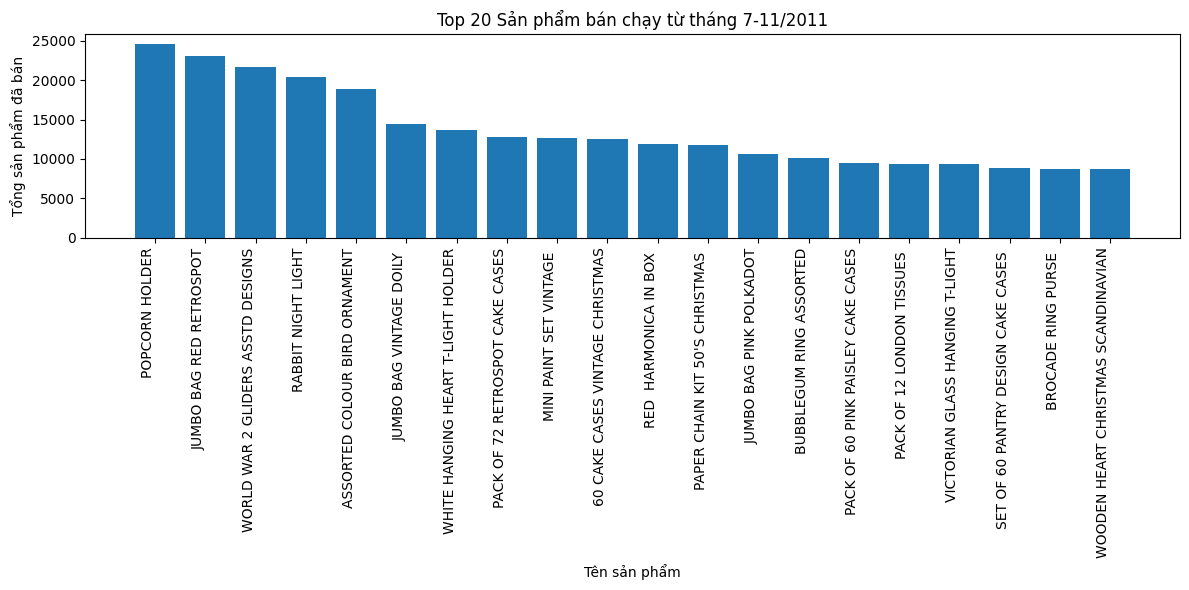

In [18]:
# Tạo biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(top_products['Standard_Description'], top_products['quantity_sum'])
plt.ylabel("Tổng sản phẩm đã bán")
plt.xlabel("Tên sản phẩm")
plt.title("Top 20 Sản phẩm bán chạy từ tháng 7-11/2011")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

###2.2 Tần suất & giá trị mua hàng trung bình giai đoạn từ tháng 7-11/2011

In [19]:
# Tính TotalAmount cho từng dòng (số lượng * đơn giá)
df1['TotalAmount'] = df1['Quantity'] * df1['UnitPrice']

# 1. Giá trị trung bình của một đơn hàng
avg_order_value = ( df1.groupby('InvoiceNo')['TotalAmount'].sum().mean())

# 2. Tần suất mua hàng trung bình của mỗi khách hàng
customer_frequency =  (df1.groupby('CustomerID')['InvoiceNo'].nunique().mean())

# 3. Giá trị trung bình mỗi khách hàng mang lại
avg_customer_value = (df1.groupby('CustomerID')['TotalAmount'].sum().mean())

# 4. Tổng doanh thu toàn bộ dataset
total_revenue = df1['TotalAmount'].sum()

# 5. Tổng số đơn hàng duy nhất
total_orders = df1['InvoiceNo'].nunique()

# Tạo chuỗi kết quả phân tích tổng quan
summary_string = f"""
TẦN SUẤT VÀ GIÁ TRỊ MUA HÀNG TRUNG BÌNH GIAI ĐOẠN T7-T11/2011:

• Giá trị trung bình mỗi đơn hàng: {round(avg_order_value, 2)} USD/đơn hàng
• Tần suất mua hàng trung bình mỗi khách: {round(customer_frequency, 2)} đơn hàng/khách
• Giá trị trung bình mỗi khách hàng: {round(avg_customer_value, 2)} USD/khách hàng
• Tổng doanh thu: {round(total_revenue, 2)} USD
• Tổng số đơn hàng: {total_orders} đơn hàng
"""

print(summary_string)


TẦN SUẤT VÀ GIÁ TRỊ MUA HÀNG TRUNG BÌNH GIAI ĐOẠN T7-T11/2011:

• Giá trị trung bình mỗi đơn hàng: 490.7 USD/đơn hàng
• Tần suất mua hàng trung bình mỗi khách: 2.71 đơn hàng/khách
• Giá trị trung bình mỗi khách hàng: 1328.08 USD/khách hàng
• Tổng doanh thu: 4344155.41 USD
• Tổng số đơn hàng: 8853 đơn hàng



# **3. Xây dựng Hệ thống gợi ý (USER-BASED FILTERING)**

In [25]:
# Tạo bảng thông tin về stockcode, description (Chứa thông tin stock_description)
stock_description_table = df1[['StockCode', 'Standard_Description']].copy()

stock_description_table.head()

,StockCode,Standard_Description
245903,84836,ZINC METAL HEART DECORATION
245904,71459,HANGING JAM JAR T-LIGHT HOLDERS
245905,22784,LANTERN CREAM GAZEBO
245906,23145,ZINC T-LIGHT HOLDER STAR LARGE
245907,22674,FRENCH TOILET SIGN BLUE METAL


In [22]:
## Tạo bảng ma trận giữa số lượng mua của mỗi sản phẩm theo khách hàng

# Tạo bảng Customer, stockcode, tổng quantity
df_agg = df1.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Tạo bảng pivot table với customerId, StockCode
pivot_table = df_agg.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)
pivot_table

StockCode,10080,10120,10124A,10124G,10125,10133,10135,11001,15030,15034,...,90214L,90214M,90214N,90214S,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
12356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18278.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
## Xác định sự tương đồng giữa các người dùng
# Cài đặt hàm nghiên cứu độ tương đồng giữa 2 khách hàng
from sklearn.metrics.pairwise import cosine_similarity

# Tạo table (ma trận tương đồng giữa người dùng)
similarity_user = pd.DataFrame(
    cosine_similarity(pivot_table),
    index= pivot_table.index,
    columns= pivot_table.index
)
similarity_user.head()

CustomerID,12347.0,12348.0,12349.0,12352.0,12356.0,12357.0,12358.0,12359.0,12360.0,12362.0,...,18270.0,18272.0,18273.0,18274.0,18276.0,18277.0,18278.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,1.000000,0.000000,0.021480,0.018758,0.030490,0.020937,0.000000,0.089429,0.002378,0.095512,...,0.0,0.015968,0.0,0.001743,0.130978,0.0,0.020149,0.000000,0.134964,0.000000
12348.0,0.000000,1.000000,0.000069,0.000617,0.000000,0.000000,0.000397,0.000000,0.000352,0.000930,...,0.0,0.000000,0.0,0.000000,0.258424,0.0,0.000000,0.000000,0.180323,0.151088
12349.0,0.021480,0.000069,1.000000,0.038646,0.005858,0.103707,0.189028,0.058146,0.045810,0.098037,...,0.0,0.110937,0.0,0.148066,0.000000,0.0,0.015680,0.013543,0.065477,0.000000
12352.0,0.018758,0.000617,0.038646,1.000000,0.021033,0.046353,0.005791,0.019465,0.006973,0.045823,...,0.0,0.171016,0.0,0.040892,0.000000,0.0,0.000000,0.000000,0.001347,0.000000
12356.0,0.030490,0.000000,0.005858,0.021033,1.000000,0.031325,0.000000,0.092541,0.000000,0.003446,...,0.0,0.000000,0.0,0.017594,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [34]:
## Nghiên cứu một khách hàng cụ thể

# Chọn khách hàng có customerID 12347
CustomerID = 12347

# Lấy top 5 khách hàng giống nhất
similar_users = similarity_user.loc[CustomerID].sort_values(ascending=False).iloc[1:6].index

# Lấy trung bình số lượng mua các sản phẩm từ các khách này
similar_products = pivot_table.loc[similar_users].mean()

# Loại bỏ sản phẩm khách hàng này đã mua
products_owned = pivot_table.loc[CustomerID] #Lấy thông tin sản phẩm của khách hàng
recommendations = similar_products[products_owned == 0].sort_values(ascending=False).head(5) #Chọn ra những sản phẩm KH chưa mua, sort theo thứ tự từ cao xuống

# Map StockCode với Description
stock_description_table_unique = stock_description_table.drop_duplicates(subset=['StockCode']) #remove trùng lặp với bảng stock_description
recommendations_with_desc = recommendations.index.map( stock_description_table_unique.set_index('StockCode')['Standard_Description'])

# In kết quả
print("Top 5 sản phẩm gợi ý cho khách hàng", CustomerID)
for i, stock_code in enumerate(recommendations.index, 1):
    description = stock_description_table_unique.set_index('StockCode').loc[stock_code]['Standard_Description']
    print(f"{i}. {stock_code} - {description}")

Top 5 sản phẩm gợi ý cho khách hàng 12347
1. 21915 - RED  HARMONICA IN BOX 
2. 23293 - SET OF 12 FAIRY CAKE BAKING CASES
3. 23295 - SET OF 12 MINI LOAF BAKING CASES
4. 23296 - SET OF 6 TEA TIME BAKING CASES
5. 22544 - MINI JIGSAW SPACEBOY


# **4. Trực quan hóa**

## 4.1 Gợi ý top 5 sản phẩm cho khách hàng

In [35]:
# Tạo hàm nhập dữ liệu CustomerID
def recommend_items(CustomerID, n_recommendations=5):
# Kiểm tra dữ liệu có ở trong bảng dữ liệu không
    if CustomerID not in pivot_table.index:
        print(f"User ID {CustomerID} Không tìm thấy.")
        return

    #Lấy top 5 khách hàng giống nhất
    similar_users = similarity_user.loc[CustomerID].sort_values(ascending=False).iloc[1:6].index

    # Lấy trung bình số lượng mua các sản phẩm từ các khách này
    similar_products = pivot_table.loc[similar_users].mean()

    #Loại bỏ sản phẩm khách hàng này đã mua
    products_owned = pivot_table.loc[CustomerID] # Chuyển pivot_user sang pivot_table
    recommendations = similar_products[products_owned == 0].sort_values(ascending=False).head(n_recommendations)

    # Map StockCode với Description
    stock_description_table_unique = stock_description_table.drop_duplicates(subset=['StockCode'])
    stock_desc_map = stock_description_table_unique.set_index('StockCode')['Standard_Description']

    # Trả về danh sách (StockCode, Description)
    recommendations_with_detail = [
        (code, stock_desc_map.get(code, "Không có mô tả"))
        for code in recommendations.index
    ]
    
    return recommendations_with_detail
# Nhập CustomerID từ người dùng
CustomerID = int(input("Nhập CustomerID: "))
recommendations = recommend_items(CustomerID)

# In kết quả
if recommendations is not None:
    print(f"Top {len(recommendations)} sản phẩm gợi ý cho khách hàng {CustomerID}:")
    for i, (code, desc) in enumerate(recommendations, 1):
        print(f"{i}. {code} - {desc}")


Top 5 sản phẩm gợi ý cho khách hàng 12348:
1. 15056N - EDWARDIAN PARASOL NATURAL
2. 22969 - HOMEMADE JAM SCENTED CANDLES
3. 22693 - GROW A FLYTRAP OR SUNFLOWER IN TIN
4. 22178 - VICTORIAN GLASS HANGING T-LIGHT
5. 22460 - EMBOSSED GLASS TEALIGHT HOLDER


## 4.2 Biểu đồ mạng các sản phẩm thường mua kèm



In [36]:
# Cài các thư viện cần thiết tạo và phân tích biểu đồ mạng
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder #phân tích giỏ hàng
import networkx as nx

In [ ]:
# Nhóm theo Invoice (giỏ hàng)
basket_data = df1.groupby(['InvoiceNo'])['Standard_Description'].apply(list)

# Chuyển sang dạng nhị phân (1-0)
te = TransactionEncoder()
te_ary = te.fit(basket_data).transform(basket_data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Tìm các sản phẩm thường mua kèm (min_support=0.02 - chỉ lấy những nhóm sp xuất hiện ít nhất 2% trong các đơn)
frequent_items = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Tìm luật kết hợp
rules = association_rules(frequent_items, metric="lift", min_threshold=1) #lift >=1 thể hiện việc sp cần mua kèm nhau
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.051508,0.036824,0.023495,0.456140,12.387149,1.0,0.021598,1.771002,0.969192,0.362369,0.435348,0.547089
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.036824,0.051508,0.023495,0.638037,12.387149,1.0,0.021598,2.620410,0.954416,0.362369,0.618380,0.547089
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.051508,0.047667,0.034000,0.660088,13.847764,1.0,0.031545,2.801701,0.978170,0.521664,0.643074,0.686679
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047667,0.051508,0.034000,0.713270,13.847764,1.0,0.031545,3.307964,0.974225,0.521664,0.697699,0.686679
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.047667,0.036824,0.023495,0.492891,13.385166,1.0,0.021740,1.899348,0.971604,0.385185,0.473503,0.565464


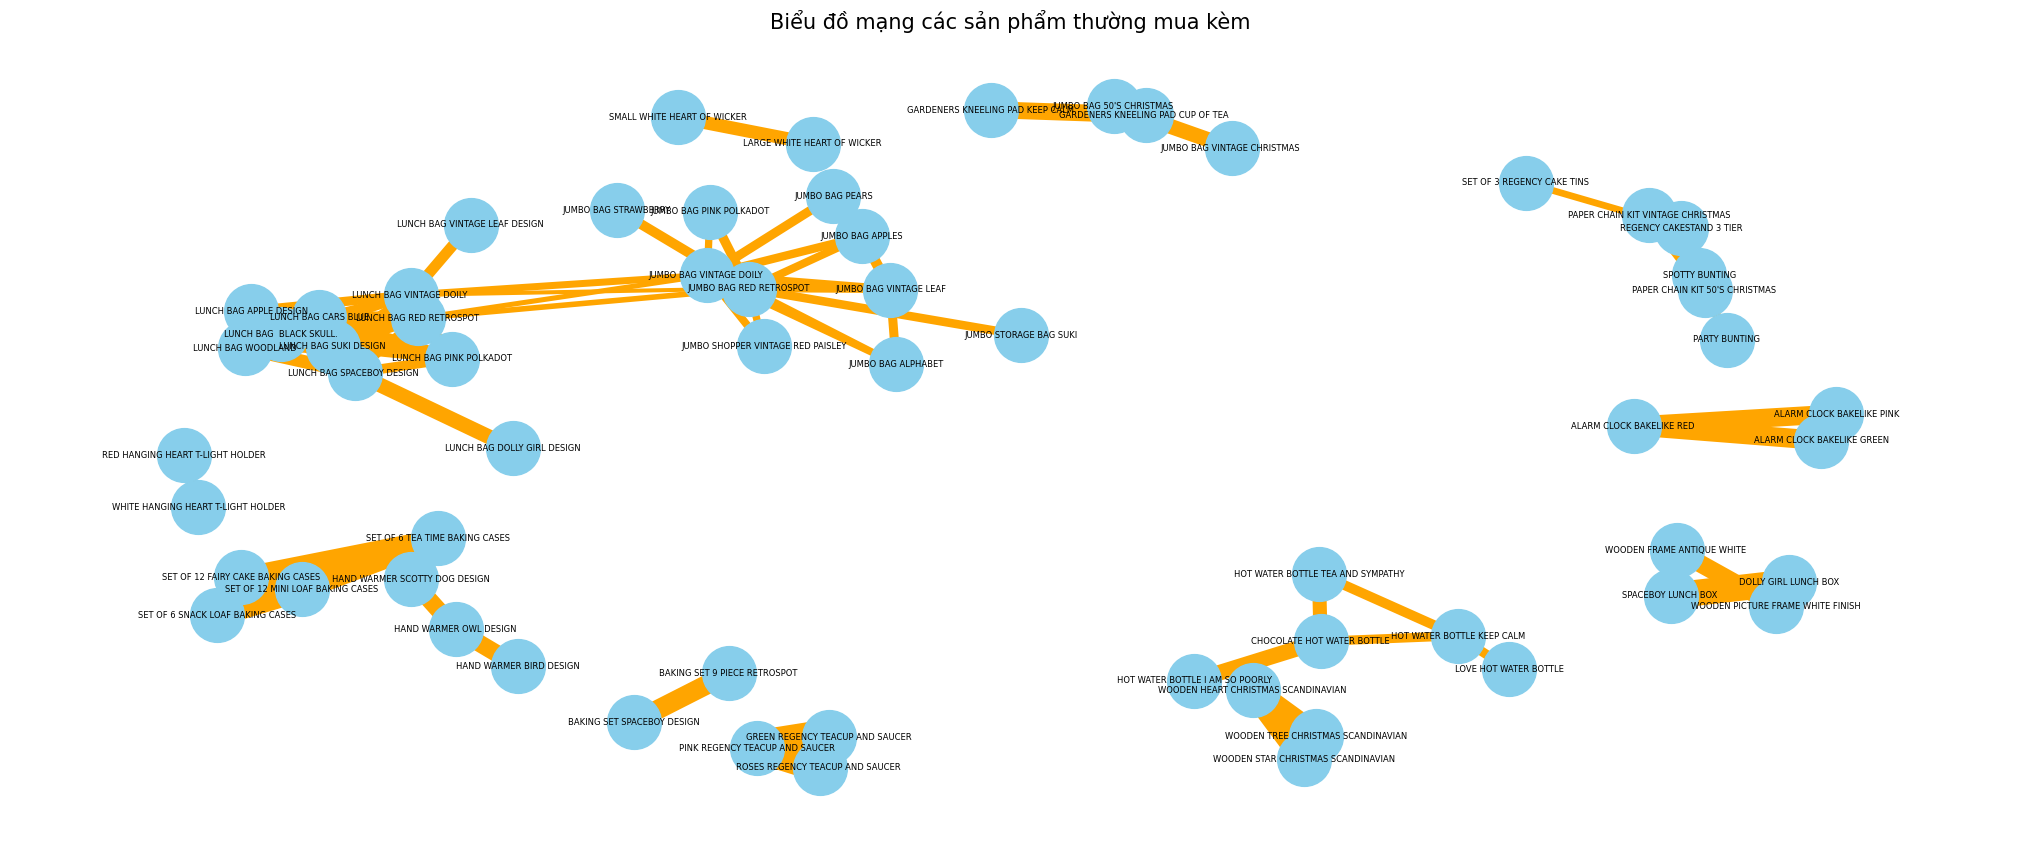

In [ ]:
# Tạo biểu đồ
network = nx.Graph()
for index, row in rules.iterrows():
    network.add_edge(', '.join(list(row['antecedents'])),
                 ', '.join(list(row['consequents'])),
                 weight=row['lift'])

# Minh họa biểu đồ
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(network, k=0.75)
edges = network.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(network, pos, with_labels=True, node_color='skyblue',
        node_size=1500, font_size=6, width=weights, edge_color='orange')
plt.title("Biểu đồ mạng các sản phẩm thường mua kèm", fontsize=15)
plt.show()